In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd.gradcheck import zero_gradients
from sklearn.decomposition import PCA
from IPython.display import Image, display
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
path = "/Users/rahulroy/Documents/ML and AI/Irradiance dataset.csv"
data = pd.read_csv(path)       #read data
data_AT = data["Avg Tower Dry Bulb Temp [deg C]"].values;
data_RH = data["Avg Tower RH [%]"].values      #access columns
data_WS = data["Avg Avg Wind Speed @ 6ft [m/s]"].values;
data_PR = data["Avg Station Pressure [mBar]"];
data_PP = data["Avg Precipitation [mm]"].values
data_SI = data["Avg Global CMP22 (vent/cor) [W/m^2]"].values
data=np.vstack((data_AT,data_RH,data_WS,data_PR,data_PP))    
data=data.T

#data pre-processing
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)

#data_PE=data_PE.T
#train_test_split - Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data_standard, data_SI, test_size=0.33)  

In [3]:
# plt.scatter(data_AT,data_SI,s=1) ;
# plt.xlabel("Ambient Temperature(˚C)");
# plt.ylabel("Solar Irradiation(MW)");
# z1 = np.polyfit(data_AT,data_SI,1)  #Linear fitting
# x1 = np.arange(-20, 40, 0.1)
# y1 = x1 * z1[0]+z1[1]
# plt.plot(x1, y1,'black')
# plt.text(15,420,'y=%.3fx%.3f'%(z1[0],z1[1]),fontsize=15)

In [4]:
# plt.scatter(data_RH,data_SI,s=1) ;
# plt.xlabel("Relative Humidity %");
# plt.ylabel("Solar Irradiation(MW)");
# z1 = np.polyfit(data_RH,data_SI,1)  #Linear fitting
# x1 = np.arange(1, 110, 0.1)
# y1 = x1 * z1[0]+z1[1]
# plt.plot(x1, y1,'black')
# plt.text(15,420,'y=%.3fx%.3f'%(z1[0],z1[1]),fontsize=15)

In [5]:
# plt.scatter(data_WS,data_SI,s=1) ;
# plt.xlabel("Wind Speed m/s");
# plt.ylabel("Solar Irradiation(MW)");
# z1 = np.polyfit(data_WS,data_SI,1)  #Linear fitting
# x1 = np.arange(0, 15, 0.1)
# y1 = x1 * z1[0]+z1[1]
# plt.plot(x1, y1,'black')
# plt.text(15,420,'y=%.3fx%.3f'%(z1[0],z1[1]),fontsize=15)

In [6]:
# plt.scatter(data_PR,data_SI,s=1) ;
# plt.xlabel("Pressure");
# plt.ylabel("Solar Irradiation(MW)");
# z1 = np.polyfit(data_PR,data_SI,1)  #Linear fitting
# x1 = np.arange(80, 800, 0.1)
# y1 = x1 * z1[0]+z1[1]
# plt.plot(x1, y1,'black')
# plt.text(15,420,'y=%.3fx%.3f'%(z1[0],z1[1]),fontsize=15)

In [7]:
# svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# predict=svr_rbf.fit(X_train, y_train).predict(X_test)
# print(y_test)
# r=r2_score(y_test,predict)
# print(r)
# MSE = mean_squared_error(y_test,predict)
# print(MSE)
# MAPE = mean_absolute_percentage_error(y_test,predict)
# print(MAPE)
# n=len(predict)
# t = np.linspace(1,n,n)
# plt.figure(figsize=(8,8))
# plt.xlabel('test(MW)',fontsize=15)
# plt.ylabel('predict(MW)',fontsize=15)
# plt.scatter(y_test,predict,s=1)
# z5 = np.polyfit(y_test,predict,1)  #Linear fitting
# x5 = np.arange(0, 1000, 0.1)
# y5 = x5 * z5[0]+z5[1]
# plt.plot(x5, y5,'black')
# plt.text(470,430,'y=%.3fx+%.3f'%(z5[0],z5[1]),fontsize=15)
# plt.title('Support Vector Regression')

In [8]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data)

In [9]:
# data[data < 0] = 0
# data[data < 0].sum()

In [10]:
# print(data)

# Data Processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATE (MM/DD/YYYY)                    8783 non-null   object 
 1   HOUR-MST                             8783 non-null   object 
 2   Avg Tower Dry Bulb Temp [deg C]      8783 non-null   float64
 3   Avg Tower RH [%]                     8783 non-null   float64
 4   Avg Avg Wind Speed @ 6ft [m/s]       8783 non-null   float64
 5   Avg Station Pressure [mBar]          8783 non-null   float64
 6   Avg Precipitation [mm]               8783 non-null   float64
 7   Avg Global CMP22 (vent/cor) [W/m^2]  8783 non-null   float64
dtypes: float64(6), object(2)
memory usage: 549.1+ KB


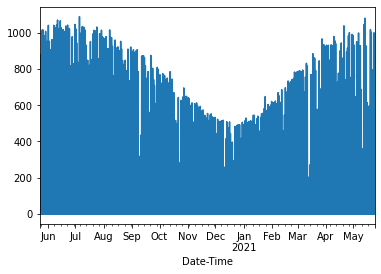

In [11]:
datas = pd.read_csv(path) ;
datas.info();
datas['Date-Time'] = datas['DATE (MM/DD/YYYY)'].str.cat(datas['HOUR-MST'],sep=" ");
datas['Date-Time'] = pd.to_datetime(datas['Date-Time'], infer_datetime_format=True);
datas.set_index('Date-Time')['Avg Global CMP22 (vent/cor) [W/m^2]'].plot();

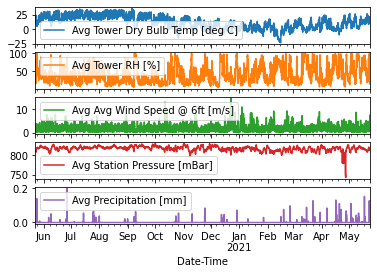

In [12]:
datas.set_index('Date-Time')[['Avg Tower Dry Bulb Temp [deg C]','Avg Tower RH [%]','Avg Avg Wind Speed @ 6ft [m/s]','Avg Station Pressure [mBar]','Avg Precipitation [mm]']].plot(subplots=True);

### Multivariate Time series Modeling

In [13]:
#features=datas[['Date-Time','Avg Tower Dry Bulb Temp [deg C]','Avg Tower RH [%]','Avg Avg Wind Speed @ 6ft [m/s]','Avg Station Pressure [mBar]','Avg Precipitation [mm]']].to_numpy().tolist();
datas_input = datas[['Avg Global CMP22 (vent/cor) [W/m^2]','Avg Tower Dry Bulb Temp [deg C]','Avg Tower RH [%]','Avg Avg Wind Speed @ 6ft [m/s]','Avg Station Pressure [mBar]','Avg Precipitation [mm]']];
datas_input
#datas.query("Avg Precipitation [mm] > 0")
scaler = MinMaxScaler()
datas_scaled = scaler.fit_transform(datas_input)
features = datas_scaled
target = datas_scaled[:,0]
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 120
batch_size = 32
num_features = 6
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

### LSTM model architecture

In [14]:
# Fit and evaluate model
model = tf.keras.Sequential()    #sequential model instance
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))           #Leaky Rectified Linear Unit Activation function
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))     #reduce overfitting of the model to the training data
model.add(tf.keras.layers.Dense(1))          #interpret the features
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 128)          69120     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 120, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=2,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


/Users/rahulroy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


216/216 [==============================] - 57s 250ms/step - loss: 0.0289 - mean_absolute_error: 0.1137 - val_loss: 0.0312 - val_mean_absolute_error: 0.1331
Epoch 2/50
216/216 [==============================] - 63s 290ms/step - loss: 0.0129 - mean_absolute_error: 0.0750 - val_loss: 0.0193 - val_mean_absolute_error: 0.0891
Epoch 3/50
216/216 [==============================] - 66s 305ms/step - loss: 0.0103 - mean_absolute_error: 0.0657 - val_loss: 0.0162 - val_mean_absolute_error: 0.0806
Epoch 4/50
216/216 [==============================] - 66s 304ms/step - loss: 0.0084 - mean_absolute_error: 0.0591 - val_loss: 0.0152 - val_mean_absolute_error: 0.0781
Epoch 5/50
216/216 [==============================] - 66s 306ms/step - loss: 0.0080 - mean_absolute_error: 0.0577 - val_loss: 0.0132 - val_mean_absolute_error: 0.0723
Epoch 6/50
216/216 [==============================] - 66s 305ms/step - loss: 0.0076 - mean_absolute_error: 0.0558 - val_loss: 0.0121 - val_mean_absolute_error: 0.0702
Epoch 7/5

In [16]:
model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(test_generator)
predictions.shape[0]
x_test[:,1:][win_length:]
datas_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(datas_pred)

/Users/rahulroy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/Users/rahulroy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


### Predicted v/s Actual values of Solar Irradiance

<ipython-input-17-4b59710b49c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Solar Irrandiance Predicted'] = rev_trans[:,0]


<AxesSubplot:>

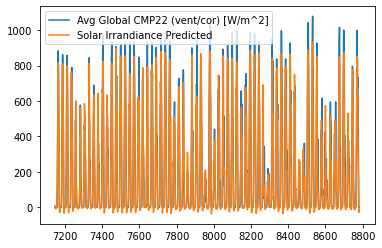

In [17]:
datas_final = datas_input[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Solar Irrandiance Predicted'] = rev_trans[:,0]
datas_final[['Avg Global CMP22 (vent/cor) [W/m^2]','Solar Irrandiance Predicted']].plot()

### FGSM Adversarial Attack

In [18]:
# levels = [0.001, 0.05,0.1,0.15,0.2,0.25]

# train_scores = []
# test_scores = []

# for level in levels:
#     x_adv_ts, y_adv_ts = FGSM_attack(x_test_ts,y_test_ts,level)
#     y_p1 = y_adv_ts.detach().numpy()    
#     r=r2_score(y_test,y_p1)
#     train_scores.append(r)
    
#     x_adv_tr, y_adv_tr = FGSM_attack(x_ts,y_ts,level)
#     y_p2 = y_adv_tr.detach().numpy()    
#     r=r2_score(y_train,y_p2)
#     test_scores.append(r)